# KICKSTARTER PROJECTS CLASSIFICATION

**Group 10:\
Vinh Ngoc Quang Pham (Thomas) - BS20DSY038\
Avtandil Abdyrakhmanov - BS20DSY039\
Javokhir Komiljionov - BS20DSY032**

## GENERAL INTRODUCTION

The dataset was obtained from the website Kaggle which is the subsidiary of Google LLC, where datasets are published and posted for data scientists and machine learning practitioners to explore and analyze to hone their skills. The dataset was gathered and uploaded by Mickaël Mouillé on November 6, 2017 and was last updated as of writing on February 8, 2018. The user is a crowdfunding enthusiast and he has been watching kickstarter since its early days. He has been collecting data and the only app he has made is this twitter bot which tweet any project reaching some milestone: @bloomwatcher and this dataset is collected from Kickstarter Platform. 

This project I will use his useful data to build models in order to anticipate the state of a kickstarter project.

# SOURCES

You can easily download our data from this website: https://www.kaggle.com/kemical/kickstarter-projects

# OUTLINE

***I) DATA INSPECTION:***

1) IMPORT LIBRARIES AND DATASET

2) GENERAL DESCRIPTION

3) VISUALIZATION OF DATASET

***II) DATA CLEANING AND TRANSFORMATION***

1) DEALING WITH NULL VALUE

2) DEALING WITH OUTLIERS

3) FEATURE SCALING

***III) TESTING MULTIPLE MODELS***

1) SPLITTING THE DATASET

2) BUILDING AND TESTING MODEL

***IV) BUILDING THE BEST MODEL FOR PREDICTION***

1) ANALYSIS OF 2 MODELS: CONFUSION MATRIX AND CLASSIFICATION REPORT

2) FINDING THE BEST MODEL:

A- LINEAR DISCRIMINANT ANALYSIS

B- LOGISTIC REGRESSION: a) Avoid Overfitting with penalty, b) Best parameter

3) APPLY NEW PARAMETER AND TRAIN IT

4) MODIFY THE THRESHOLD

***V) MAKE PREDICTION***

***VI) CONCLUSION***

# I) DATA INSPECTION

**1) IMPORT LIBRARIES AND DATASET**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix

In [2]:
df_kp = pd.read_csv('ks-projects-201801.csv')
df_kp

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


**2) GENERAL DESCRIPTION**

In [3]:
df_kp.shape

(378661, 15)

In [4]:
df_kp.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
df_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df_kp.loc[df_kp['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [7]:
cor_matrix = df_kp.corr()
cor_matrix

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001679,0.000466,0.000654,-0.000633,-0.000025,0.001854
goal,0.001679,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692
pledged,0.000466,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024
backers,0.000654,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000025,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596
usd_goal_real,0.001854,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000


**3) VISUALIZATION OF DATASET**

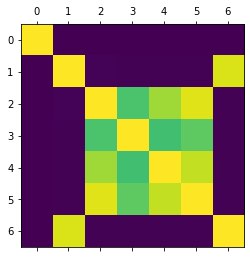

In [8]:
plt.matshow(df_kp.corr())
plt.show()

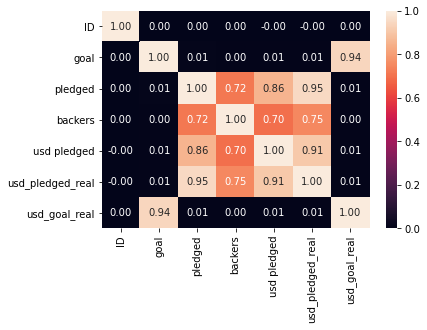

In [9]:
sns.heatmap(df_kp.corr(), annot = True, fmt = '.2f')

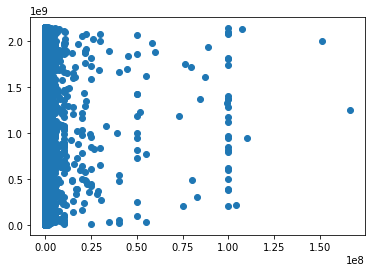

In [10]:
plt.scatter(df_kp['usd_goal_real'], df_kp['ID'])

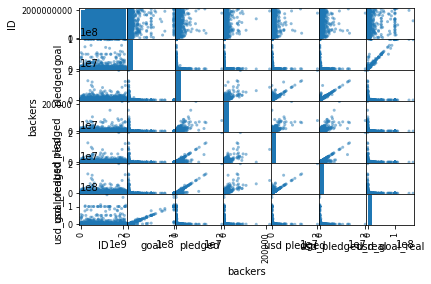

In [27]:
scatter_matrix(df_kp)
plt.show()

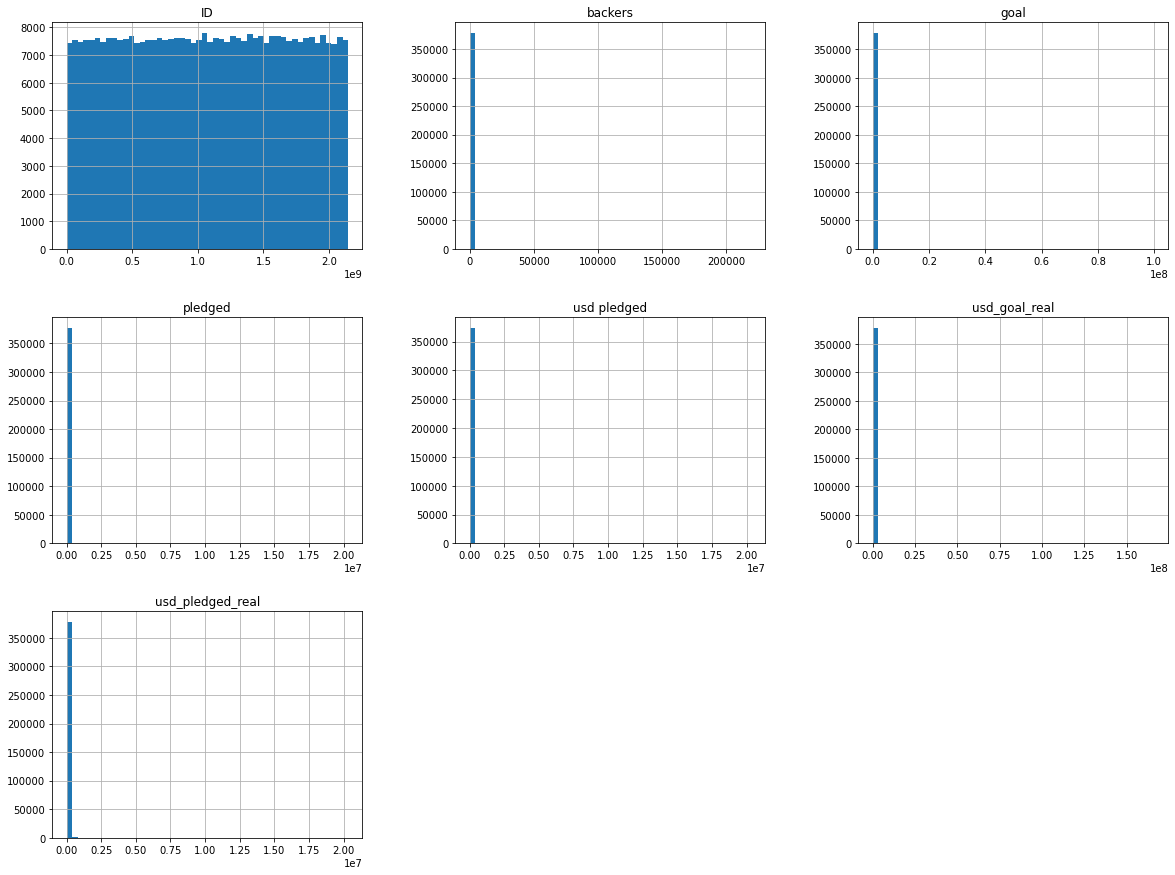

In [28]:
df_kp.hist(bins=50, figsize=(20, 15))
plt.show()

# II) DATA CLEANING AND TRANFORMATION

**1) DEALING WITH NULL VALUE**

In [11]:
df_kp['usd pledged'] = df_kp['usd pledged'].fillna(0)
df_kp['name'] = df_kp['name'].fillna('')
df_kp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378661 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       378661 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In order to deal with missing values, we have to fill the null values with 0
About the 'name' column, this is the identified column so we have to fill the null value with a blank

**2) DEALING WITH OUTLIERS**\
Because in real life data, there will always exist outliers in the dataset so I will keep the outliers in the training data to cope with such problem.

**3) FEATURE SCALING**

In [12]:
df_kp.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,6.966168e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.824761e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.345000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.750000e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.000000e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [13]:
# # Category column
# category_values = {}

# for idx, value in enumerate(df_kp['category'].unique()):
#     category_values[value] = idx
    
# df_kp['category'] = df_kp['category'].map(category_values)
# df_kp['category']

This is the mapping that change the categorical values into numberical values

In [14]:
categorical_columns = ['category', 'main_category', 'currency', 'state', 'country']

Applying the mapping for each of the above columns

In [15]:
for column in categorical_columns:
    values = {}

    for idx, value in enumerate(df_kp[column].unique()):
        values[value] = idx

    df_kp[column] = df_kp[column].map(values)

In [16]:
#convert from time stamp to unix time
time_columns = ['deadline', 'launched']

In [17]:
for column in time_columns:
    df_kp[column] = pd.to_datetime(df_kp[column]).astype(np.int64) // (10 ** 6)

Using the above code to change all the time columns in the df into unix time (total seconds from 1/1/1970 till the date)

In [18]:
df_kp

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,0,0,0,1444348800000,1000.0,1439295148000,0.0,0,0,0,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,1,1,1,1509494400000,30000.0,1504327437000,2421.0,0,15,1,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,1,1,1,1361836800000,45000.0,1357950050000,220.0,0,3,1,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,2,2,1,1334534400000,5000.0,1331954651000,1.0,0,1,1,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,3,1,1,1440806400000,19500.0,1435998903000,1283.0,1,14,1,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),8,1,1,1413504000000,50000.0,1410921330000,25.0,1,1,1,25.0,25.0,50000.00
378657,999977640,The Tribe,1,1,1,1311033600000,1500.0,1308713714000,155.0,0,5,1,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,1,1,1,1281916800000,15000.0,1278013230000,20.0,0,1,1,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,57,12,1,1455321600000,15000.0,1452708833000,200.0,0,6,1,200.0,200.0,15000.00


In [19]:
scaler = StandardScaler()
scaler.fit(df_kp.drop(['ID', 'name', 'state'], axis=1))
kp_scaled = scaler.transform(df_kp.drop(['ID', 'name', 'state'], axis=1))

The standard scaler change the values of each columns base on the formula: The standard score of a sample x is calculated as:
z = (x - u) / s

In [20]:
kp_scaled

array([[-1.12429920e+00, -1.20929056e+00, -9.31907148e-01, ...,
        -8.90273495e-02, -9.95779173e-02, -3.80940261e-02],
       [-1.09529580e+00, -9.65707446e-01, -2.34604669e-01, ...,
        -8.77493536e-02, -7.29656910e-02, -1.34042423e-02],
       [-1.09529580e+00, -9.65707446e-01, -2.34604669e-01, ...,
        -8.62157584e-02, -9.71596233e-02, -3.94121205e-04],
       ...,
       [-1.09529580e+00, -9.65707446e-01, -2.34604669e-01, ...,
        -8.87717503e-02, -9.93580724e-02, -2.64143633e-02],
       [ 5.28894245e-01,  1.71370686e+00, -2.34604669e-01, ...,
        -8.64713576e-02, -9.73794682e-02, -2.64143633e-02],
       [ 1.05095533e+00,  1.22654062e+00, -2.34604669e-01, ...,
        -8.23306508e-02, -9.38179807e-02, -3.76898016e-02]])

In [21]:
kp_scaled_df = pd.DataFrame(kp_scaled)

In [22]:
kp_scaled_df.columns=df_kp.drop(['ID', 'name', 'state'], axis=1).columns

In [23]:
kp_scaled_df['ID']=df_kp['ID']
kp_scaled_df['name']=df_kp['name']
kp_scaled_df['state']=df_kp['state']

Change the scaled np array to pandas dataframe

In [24]:
kp_scaled_df

,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,ID,name,state
0,-1.124299,-1.209291,-0.931907,0.487259,-0.040630,0.448672,-0.101248,-0.116423,-0.614127,-0.089027,-0.099578,-0.038094,1000002330,The Songs of Adelaide & Abullah,0
1,-1.095296,-0.965707,-0.234605,1.563616,-0.016124,1.514831,-0.075934,-0.099889,-0.258932,-0.087749,-0.072966,-0.013404,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,0
2,-1.095296,-0.965707,-0.234605,-0.876032,-0.003448,-0.884924,-0.098948,-0.113117,-0.258932,-0.086216,-0.097160,-0.000394,1000004038,Where is Hank?,0
3,-1.066292,-0.722124,-0.234605,-1.327131,-0.037250,-1.311100,-0.101238,-0.115321,-0.258932,-0.089015,-0.099567,-0.035088,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,0
4,-1.037289,-0.965707,-0.234605,0.428730,-0.024997,0.394633,-0.087833,-0.100991,-0.258932,-0.072631,-0.085475,-0.022511,1000011046,Community Film Project: The Art of Neighborhoo...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,-0.892272,-0.965707,-0.234605,-0.022369,0.000777,-0.016497,-0.100987,-0.115321,-0.258932,-0.088708,-0.099303,0.003943,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),1
378657,-1.095296,-0.965707,-0.234605,-1.715419,-0.040207,-1.692119,-0.099628,-0.110912,-0.258932,-0.087046,-0.097874,-0.038123,999977640,The Tribe,0
378658,-1.095296,-0.965707,-0.234605,-2.196496,-0.028799,-2.195432,-0.101039,-0.115321,-0.258932,-0.088772,-0.099358,-0.026414,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,0
378659,0.528894,1.713707,-0.234605,0.668555,-0.028799,0.668580,-0.099157,-0.109810,-0.258932,-0.086471,-0.097379,-0.026414,999987933,BioDefense Education Kit,0


In [25]:
kp_scaled_df['state'].isnull().any()

False

# III) TESTING MULTIPLE MODELS

**1) SPLITTING THE DATASET INTO TRAIN AND TEST SET**

In [26]:
kp_scaled_df

,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,ID,name,state
0,-1.124299,-1.209291,-0.931907,0.487259,-0.040630,0.448672,-0.101248,-0.116423,-0.614127,-0.089027,-0.099578,-0.038094,1000002330,The Songs of Adelaide & Abullah,0
1,-1.095296,-0.965707,-0.234605,1.563616,-0.016124,1.514831,-0.075934,-0.099889,-0.258932,-0.087749,-0.072966,-0.013404,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,0
2,-1.095296,-0.965707,-0.234605,-0.876032,-0.003448,-0.884924,-0.098948,-0.113117,-0.258932,-0.086216,-0.097160,-0.000394,1000004038,Where is Hank?,0
3,-1.066292,-0.722124,-0.234605,-1.327131,-0.037250,-1.311100,-0.101238,-0.115321,-0.258932,-0.089015,-0.099567,-0.035088,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,0
4,-1.037289,-0.965707,-0.234605,0.428730,-0.024997,0.394633,-0.087833,-0.100991,-0.258932,-0.072631,-0.085475,-0.022511,1000011046,Community Film Project: The Art of Neighborhoo...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,-0.892272,-0.965707,-0.234605,-0.022369,0.000777,-0.016497,-0.100987,-0.115321,-0.258932,-0.088708,-0.099303,0.003943,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),1
378657,-1.095296,-0.965707,-0.234605,-1.715419,-0.040207,-1.692119,-0.099628,-0.110912,-0.258932,-0.087046,-0.097874,-0.038123,999977640,The Tribe,0
378658,-1.095296,-0.965707,-0.234605,-2.196496,-0.028799,-2.195432,-0.101039,-0.115321,-0.258932,-0.088772,-0.099358,-0.026414,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,0
378659,0.528894,1.713707,-0.234605,0.668555,-0.028799,0.668580,-0.099157,-0.109810,-0.258932,-0.086471,-0.097379,-0.026414,999987933,BioDefense Education Kit,0


In [27]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(kp_scaled, kp_scaled_df['state'], test_size=0.2, random_state=42, stratify = kp_scaled_df['state'])

**2) BUILDING AND TESTING MODELS**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [29]:
from sklearn import  model_selection
from sklearn.metrics import classification_report #Reporting metric
from sklearn.metrics import confusion_matrix #Confusion_matrix Reporting
from sklearn.metrics import accuracy_score #Accuracy calculating

In [31]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('DT', DecisionTreeClassifier()))
# models.append(('SVM', SVC())) 
models.append(('RF', RandomForestClassifier()))
# models.append(('MLP', MLPClassifier(hidden_layer_sizes=32, learning_rate=0.001)))
models.append(('XGB', XGBClassifier()))

y = sgn(w^T * x)

In [32]:
results = []
names = []

In [33]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


LR:0.767803(0.000975)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


DT:0.821433(0.001488)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RF:0.887135(0.000775)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:12:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:15:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:16:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

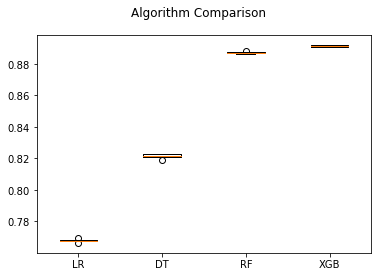

In [34]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# IV) BUILDING THE BEST MODEL FOR PREDICTION

#### Random Forest

In [35]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,Y_train)
pred = rf_classifier.predict(X_test)

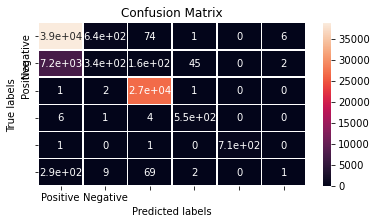

In [36]:
cm1=confusion_matrix(Y_test,pred)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [37]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     39544
           1       0.34      0.04      0.08      7756
           2       0.99      1.00      0.99     26792
           3       0.92      0.98      0.95       560
           4       1.00      1.00      1.00       712
           5       0.11      0.00      0.01       369

    accuracy                           0.89     75733
   macro avg       0.70      0.67      0.65     75733
weighted avg       0.84      0.89      0.85     75733



##### Tuning

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    'n_estimators': [50, 100, 150]
}

model_rf = RandomForestClassifier()

grid_search1 = GridSearchCV(
    model_rf, param_grid1, cv=5, scoring='accuracy')
grid_search1.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 150]}, scoring='accuracy')

In [42]:
grid_search1.best_score_

0.8872438343717173

#### XGBoost

In [38]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,Y_train)
pred = xgb_classifier.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:26:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


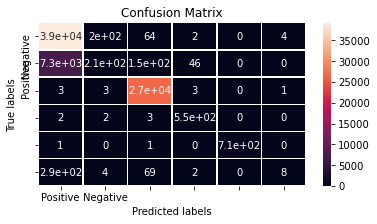

In [39]:
cm1=confusion_matrix(Y_test,pred)
fig, ax= plt.subplots(figsize=(6,3))
sns.heatmap(cm1, annot=True, ax = ax,linewidths=.5); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [40]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     39544
           1       0.50      0.03      0.05      7756
           2       0.99      1.00      0.99     26792
           3       0.91      0.99      0.95       560
           4       1.00      1.00      1.00       712
           5       0.62      0.02      0.04       369

    accuracy                           0.89     75733
   macro avg       0.81      0.67      0.66     75733
weighted avg       0.86      0.89      0.85     75733



**Tunning** 

In [43]:
param_grid2 = {
    'n_estimators': [50, 100, 150]
}

model_xgb = XGBClassifier()

grid_search2 = GridSearchCV(
    model_xgb, param_grid2, cv=5, scoring='accuracy')
grid_search2.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [44]:
grid_search2.best_score_

0.8914890687941254

# Conclusion

I get the score of 0.8914890687941254 using XGBoost with parameters optimisation.
There are still way to improve the result.